In [1]:
#importing Libraries

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv("clustering_data.csv")

C:\Users\risha\AppData\Local\Temp\ipykernel_21292\3526392609.py:8: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("clustering_data.csv")


In [2]:
df.head()

,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
0,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Peddakotla B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.5689,77.85624
1,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Pinnadhari B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.5281,77.857014
2,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Yerraguntapalle B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.561111,77.85715
3,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Obulareddipalli B.O,515581,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.2488,78.2588
4,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Odulapalli B.O,515581,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.24555,78.2477


<h3>Picking Entries from Uttar Pradesh</h3>

In [3]:
df_state = above_35 = df[df["StateName"] == "UTTAR PRADESH"]
df_state.head()

,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
201,Uttar Pradesh Circle,Kanpur Region,Kanpur HO Division,NDC Kanpur,208001,PO,Non Delivery,KANPUR NAGAR,UTTAR PRADESH,NaN,NaN
277,Uttar Pradesh Circle,Gorakhpur Region,Gorakhpur Division,NDC Gorakhpur,273001,PO,Non Delivery,GORAKHPUR,UTTAR PRADESH,26.7606,83.3732
1172,Uttar Pradesh Circle,Lucknow HQ Region,Ghaziabad Division,NDC Ghaziabad,201001,PO,Non Delivery,GHAZIABAD,UTTAR PRADESH,28.6556,77.4277
1281,Uttar Pradesh Circle,Agra Region,Agra Division,NDC Agra,282001,PO,Non Delivery,AGRA,UTTAR PRADESH,27.1651847,78.0119017
2480,Uttar Pradesh Circle,Allahabad Region,Allahabad Division,NTPC Kohdar Meja SO,212308,PO,Delivery,PRAYAGRAJ,UTTAR PRADESH,25.1417,81.9846


<h3>Checking for null entries</h3>

In [4]:
pd.isnull(df_state).sum()

CircleName        0
RegionName        1
DivisionName      1
OfficeName        0
Pincode           0
OfficeType        0
Delivery          0
District          0
StateName         0
Latitude        517
Longitude       518
dtype: int64

In [5]:
df_state.shape

(17692, 11)

<h3>Preprocessing</h3>
<h4>Out of 17691 entries 500 is not alot so we can drop rows with null values</h4> 

In [6]:
df_state = df_state[df_state['RegionName'].notna()]
df_state = df_state[df_state['DivisionName'].notna()]
df_state = df_state[df_state['Latitude'].notna()]
df_state = df_state[df_state['Longitude'].notna()]

In [7]:
pd.isnull(df_state).sum()

CircleName      0
RegionName      0
DivisionName    0
OfficeName      0
Pincode         0
OfficeType      0
Delivery        0
District        0
StateName       0
Latitude        0
Longitude       0
dtype: int64

In [8]:
df_state.duplicated().sum()

0

In [9]:
df_state["Longitude"] = pd.to_numeric(df_state["Longitude"], errors='coerce').fillna(0)

In [10]:
df_state["Latitude"] = pd.to_numeric(df_state["Latitude"], errors='coerce').fillna(0)

In [11]:
pd.isnull(df_state).sum()

CircleName      0
RegionName      0
DivisionName    0
OfficeName      0
Pincode         0
OfficeType      0
Delivery        0
District        0
StateName       0
Latitude        0
Longitude       0
dtype: int64

<h3>removing outliers</h3>

<Axes: >

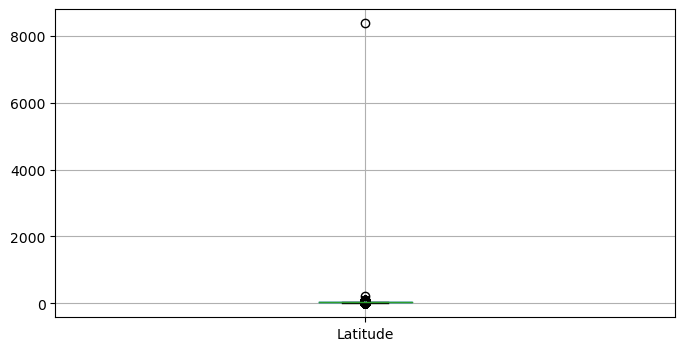

In [12]:
plt.figure(figsize=(8, 4))
df_state.boxplot(column = "Latitude")

<Axes: >

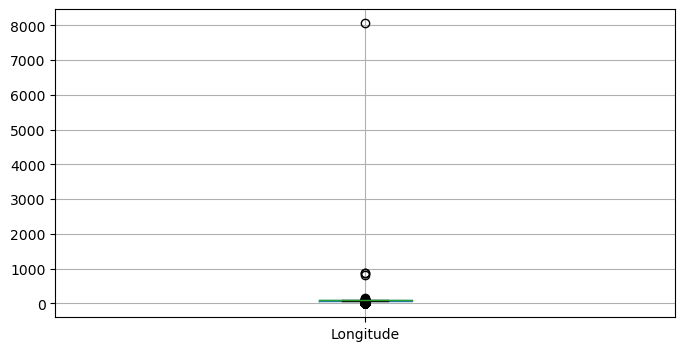

In [13]:
plt.figure(figsize=(8, 4))
df_state.boxplot(column = "Longitude")

In [14]:

for col in ["Longitude","Latitude"]:
    # Calculate the quartiles and IQR
    q1 = df_state[col].quantile(0.25)
    q3 = df_state[col].quantile(0.75)
    iqr = q3 - q1

# Calculate the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

# Identify outliers
    outliers = df_state[(df_state[col] < lower_bound) | (df_state[col] > upper_bound)]
# Replace outliers with median
    df_state.drop(outliers.index,inplace = True)
    


<Axes: >

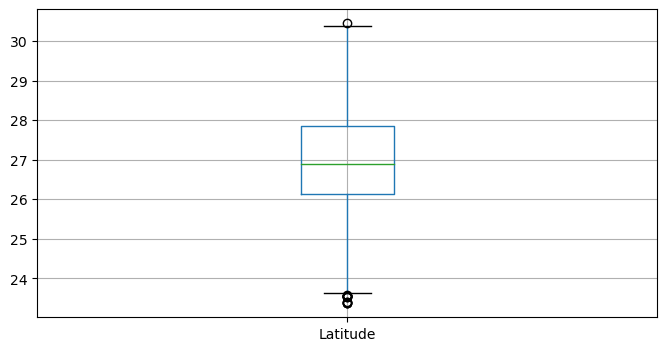

In [15]:
plt.figure(figsize=(8, 4))
df_state.boxplot(column = "Latitude")

<Axes: >

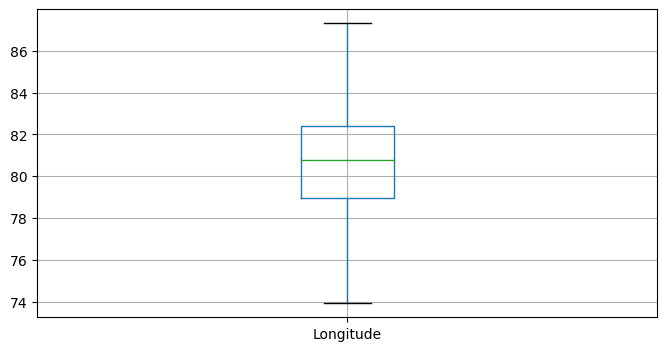

In [16]:
plt.figure(figsize=(8, 4))
df_state.boxplot(column = "Longitude")

In [17]:
for col in ["Latitude"]:
    # Calculate the quartiles and IQR
    q1 = df_state[col].quantile(0.25)
    q3 = df_state[col].quantile(0.75)
    iqr = q3 - q1

# Calculate the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

# Identify outliers
    outliers = df_state[(df_state[col] < lower_bound) | (df_state[col] > upper_bound)]

    df_state.drop(outliers.index,inplace = True)
    

In [18]:
i = df_state[df_state['Pincode'] == 802131].index
df_state.drop(i,inplace = True)

<Axes: >

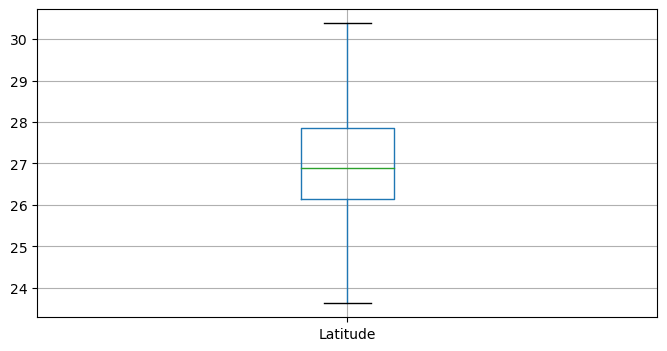

In [19]:
plt.figure(figsize=(8, 4))
df_state.boxplot(column = "Latitude")

In [20]:
df_state.shape

(15988, 11)

<h4>After removing null values and outliers we are left with 15988 entires</h4>

<h3>Visualization</h3>

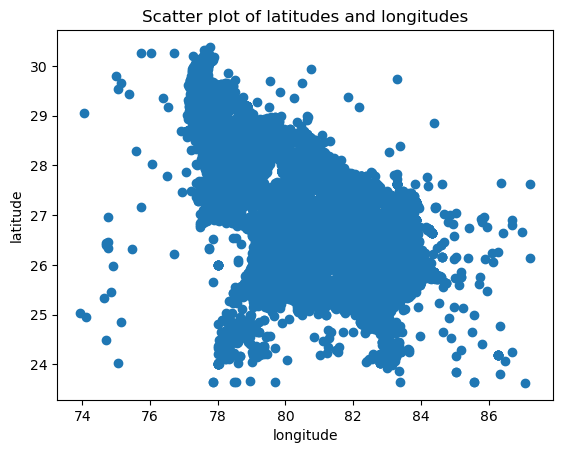

In [21]:
plt.scatter(x=df_state['Longitude'], y=df_state['Latitude'])
plt.title('Scatter plot of latitudes and longitudes')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

In [22]:
import plotly.express as px
import pandas as pd

In [23]:
fig = px.scatter_mapbox(df_state, 
                        lat="Latitude", 
                        lon="Longitude", 
                        color="Pincode",
                        range_color= [110025,285223], 
                        zoom=8, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

<h3>Applying K-means</h3>

In [1]:
def find_closest_centroids(X, centroids):
    K = centroids.shape[0]
    m = X.shape[0]
    # finding and labeling each point to the lable of their closest centroid
    idx = np.zeros(X.shape[0], dtype=int)
    for i in range(m):
        xi = X.iloc[i]
        dis = []
        for j in range(K):
            diff = xi - centroids[j]
            mag = np.sqrt(diff.dot(diff))
            dis.append(mag)
        idx[i] = np.argmin(dis)
    return idx

In [2]:
def compute_centroids(X, idx, K):
    m, n = X.shape
    
    centroids = np.zeros((K, n))
    #finding the new centroid location by taking avg of all points with same label
    for i in range(K):
        count = 0
        total = 0
        for j in range(m):
            if idx[j] == i:
                total += X.iloc[j]
                count += 1
        centroids[i] = total/count
    
    return centroids

In [3]:
def run_kMeans(X, initial_centroids, max_iters=10,):
    
    m = X.shape[0]

    K = initial_centroids.shape[0]

    centroids = initial_centroids  

    idx = np.zeros(m)
    
    # Run K-Means
    for i in range(max_iters):
        print("into loop",i)

        idx = find_closest_centroids(X, centroids)
            
        centroids = compute_centroids(X, idx, K)
    return centroids, idx

In [4]:
def kMeans_init_centroids(X, K):
    #random intialising of centroids
    randidx = np.random.permutation(X.shape[0])
    
    centroids = X.iloc[randidx[:K]]
    
    return centroids

<h4>Testing K-means algo with 3 clusters</h4>

In [28]:
K = 3
max_iters = 10
X = df_state[["Latitude","Longitude"]]
X.reset_index(inplace = True,drop=True)

initial_centroids = kMeans_init_centroids(X, K).to_numpy()

centroids, idx = run_kMeans(X, initial_centroids, max_iters)

into loop 0
in func 1
[2 0 0 ... 0 0 0]
in func 2
[[28.06673237 78.0371604 ]
 [27.1092108  80.23620461]
 [26.21374697 82.71362065]]
into loop 1
in func 1
[2 0 0 ... 0 0 0]
in func 2
[[28.39237748 78.14094999]
 [26.79157132 80.23010892]
 [26.23534087 82.74065492]]
into loop 2
in func 1
[2 0 0 ... 0 0 0]
in func 2
[[28.40896957 78.20508218]
 [26.71002883 80.25760172]
 [26.24479489 82.76634172]]
into loop 3
in func 1
[2 0 0 ... 0 0 0]
in func 2
[[28.40541218 78.22197773]
 [26.68884063 80.2755922 ]
 [26.24730756 82.77935684]]
into loop 4
in func 1
[2 0 0 ... 0 0 0]
in func 2
[[28.40396469 78.22543821]
 [26.6833282  80.28361454]
 [26.24780362 82.78561103]]
into loop 5
in func 1
[2 0 0 ... 0 0 0]
in func 2
[[28.40207664 78.22661239]
 [26.68204417 80.28684798]
 [26.24784857 82.78710156]]
into loop 6
in func 1
[2 0 0 ... 0 0 0]
in func 2
[[28.40207664 78.22661239]
 [26.6821506  80.2873385 ]
 [26.2476113  82.7874829 ]]
into loop 7
in func 1
[2 0 0 ... 0 0 0]
in func 2
[[28.40207664 78.22661239]

In [29]:
X = X.assign(IDX=idx)

<h4>Visualising clusters</h4>

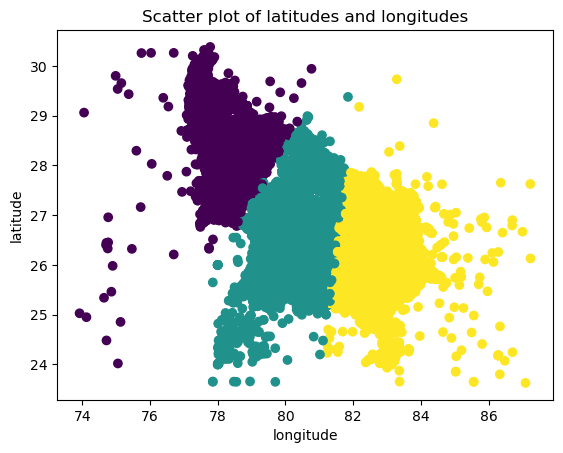

In [30]:
plt.scatter(x=X['Longitude'], y=X['Latitude'],c=X['IDX'])
plt.title('Scatter plot of latitudes and longitudes')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

<h3>Applying Elbow Method</h3>

In [5]:
def distortion(centroids,X,idx):
    #finding distortion and intertia
    K = centroids.shape[0]
    m = X.shape[0]
    distort = 0
    inert = 0
    for i in range(K):
        count = 0
        total = 0
        for j in range(m):
            if idx[j] == i:
                diff = X.iloc[j] - centroids[i]
                mag = np.sqrt(diff.dot(diff))
                inert += mag
                count += 1
    distort = inert/m
    return distort, inert

In [34]:
Ks = []
distortions = []
inertias = []
for i in range(1,11):
    max_its = 6
    Ks.append(i)
    print("k =",i)
    initial_centroids = kMeans_init_centroids(X, i).to_numpy()
    centroids, idx = run_kMeans(X, initial_centroids, max_iters=max_its)
    distort,inert = distortion(centroids,X,idx)
    distortions.append(distort)
    inertias.append(inert)

k = 1
into loop 0
[0 0 0 ... 0 0 0]
[[26.99334926 80.67022323  1.10432825]]
into loop 1
[0 0 0 ... 0 0 0]
[[26.99334926 80.67022323  1.10432825]]
into loop 2
[0 0 0 ... 0 0 0]
[[26.99334926 80.67022323  1.10432825]]
into loop 3
[0 0 0 ... 0 0 0]
[[26.99334926 80.67022323  1.10432825]]
into loop 4
[0 0 0 ... 0 0 0]
[[26.99334926 80.67022323  1.10432825]]
into loop 5
[0 0 0 ... 0 0 0]
[[26.99334926 80.67022323  1.10432825]]
k = 2
into loop 0
[0 1 1 ... 1 1 1]
[[26.39686636 81.66734842  1.54735426]
 [28.3680463  78.37217738  0.08329888]]
into loop 1
[0 1 1 ... 1 1 1]
[[26.38137265 81.83136845  1.58357238]
 [28.15068223 78.47433594  0.19801085]]
into loop 2
[0 1 1 ... 1 1 1]
[[26.38809363 81.99005594  1.62205687]
 [27.95468371 78.57391779  0.28201392]]
into loop 3
[0 1 1 ... 1 1 1]
[[26.3848841  82.09712405  1.65244815]
 [27.85129062 78.65828016  0.33147422]]
into loop 4
[0 1 1 ... 1 1 1]
[[26.37827243 82.14521836  1.66816291]
 [27.8130329  78.70456734  0.35293259]]
into loop 5
[0 1 1 ... 

In [36]:
inertias

[35825.238865717256,
 22397.900147114076,
 16477.33280967748,
 15198.312775854984,
 13585.4659463723,
 13122.96859236016,
 12424.405963276422,
 11743.400352243341,
 10802.818173405998,
 10064.451365919393]

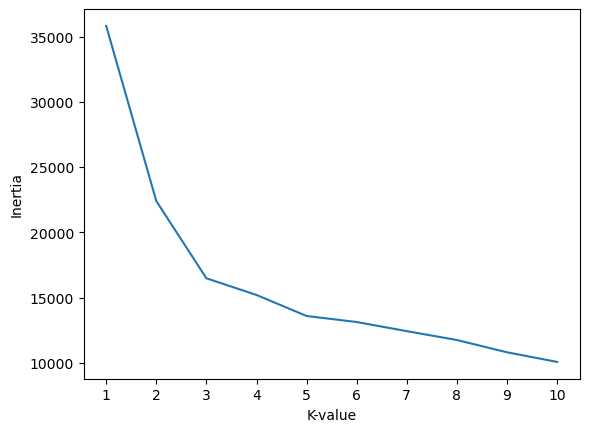

In [45]:
plt.plot(Ks,inertias)
plt.xlabel('K-value')
plt.ylabel('Inertia')
plt.xticks(Ks)
plt.show()

<h4>We can see that after k value of 5 we see the graph linearly decrease, so we can take the value of k as 5 </h4>

In [48]:
K = 5
max_iters = 6
X = df_state[["Latitude","Longitude"]]
X.reset_index(inplace = True,drop=True)

initial_centroids = kMeans_init_centroids(X, K).to_numpy()

centroids, idx = run_kMeans(X, initial_centroids, max_iters)

into loop 0
into loop 1
into loop 2
into loop 3
into loop 4
into loop 5


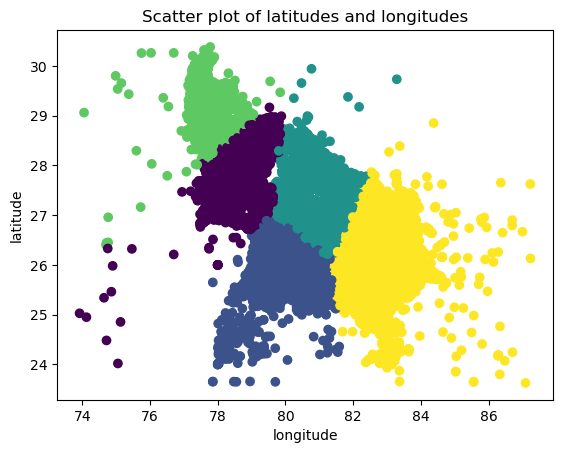

In [49]:
plt.scatter(x=X['Longitude'], y=X['Latitude'],c=idx)
plt.title('Scatter plot of latitudes and longitudes')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

<h4>We can see 5 distict clusters in which the state has been divided in to two regions in the south,one the north and two in the center<h4>

<h4>the north region also resembels delhi ncr region</h4>